In [ ]:
Dimensionality Reduction: We'll use PCA to reduce the number of features.
Ensemble Modeling: We'll use Random Forest and GBM as the ensemble methods after dimensionality reduction.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv(r"C:\Users\super\Downloads\environmental_data_with_near_real_pm25.csv")

In [2]:
print(df.isnull().sum())

Country                                    0
PM2.5 Concentration (µg/m³)               48
CO2 Emissions (metric tons per capita)    31
Air Pollution Index                        0
Water Quality Index                        0
dtype: int64


In [3]:
initial_rows = len(df)
df = df.drop_duplicates()
print(f"Removed {initial_rows - len(df)} duplicate rows.")

Removed 0 duplicate rows.


In [4]:
for column in df.columns:
    if df[column].dtype == float:  
        df[column].fillna(df[column].mean(), inplace=True)


scaler = MinMaxScaler()
numerical_columns = ['PM2.5 Concentration (µg/m³)', 'CO2 Emissions (metric tons per capita)', 
                     'Air Pollution Index', 'Water Quality Index']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print(df.head())

       Country  PM2.5 Concentration (µg/m³)  \
0  Afghanistan                     1.000000   
1      Albania                     0.054591   
2      Algeria                     0.151421   
3      Andorra                     0.517226   
4       Angola                     0.173116   

   CO2 Emissions (metric tons per capita)  Air Pollution Index  \
0                                0.005792             0.155817   
1                                0.047484             0.819168   
2                                0.116082             0.833467   
3                                0.181059             0.505766   
4                                0.017446             0.000000   

   Water Quality Index  
0             0.273399  
1             0.590675  
2             0.912466  
3             0.206865  
4             0.621461  


In [2]:
data = pd.read_csv("C:\\Users\\super\\Downloads\\cleaned_environmental_data.csv")
world_data = pd.read_csv("C:\\Users\\super\\Downloads\\world-data-2023_cleaned.csv")

In [3]:
columns_to_add = [
    'Country',  
    'Life expectancy',  
    'GDP', 
    'Out of pocket health expenditure',
    'Gross tertiary education enrollment (%)',
    'Population',
    'Urban_population'  
]

In [4]:
if 'Country' not in data.columns:
    data.rename(columns={df.columns[0]: 'Country'}, inplace=True)

if 'Country' in world_data.columns and 'Country' in data.columns:
    merged_data = pd.merge(data, world_data[columns_to_add], on='Country', how='inner')
    print(merged_data.head())
else:
    print("Country column is missing in one of the dataframes or incorrectly named.")

       Country  PM2.5 Concentration (µg/m³)  \
0  Afghanistan                     1.000000   
1      Albania                     0.054591   
2      Algeria                     0.151421   
3      Andorra                     0.517226   
4       Angola                     0.173116   

   CO2 Emissions (metric tons per capita)  Air Pollution Index  \
0                                0.005792             0.155817   
1                                0.047484             0.819168   
2                                0.116082             0.833467   
3                                0.181059             0.505766   
4                                0.017446             0.000000   

   Water Quality Index  Life expectancy           GDP  \
0             0.273399        64.500000  1.910135e+10   
1             0.590675        78.500000  1.527808e+10   
2             0.912466        76.700000  1.699882e+11   
3             0.206865        72.279679  3.154058e+09   
4             0.621461        60.80

Life expectancy                            1.000000
Gross tertiary education enrollment (%)    0.714553
CO2 Emissions (metric tons per capita)     0.448901
GDP                                        0.175355
Air Pollution Index                        0.094701
Urban_population                           0.070007
Population                                 0.008409
Water Quality Index                        0.005960
Out of pocket health expenditure          -0.317561
PM2.5 Concentration (µg/m³)               -0.384366
Name: Life expectancy, dtype: float64


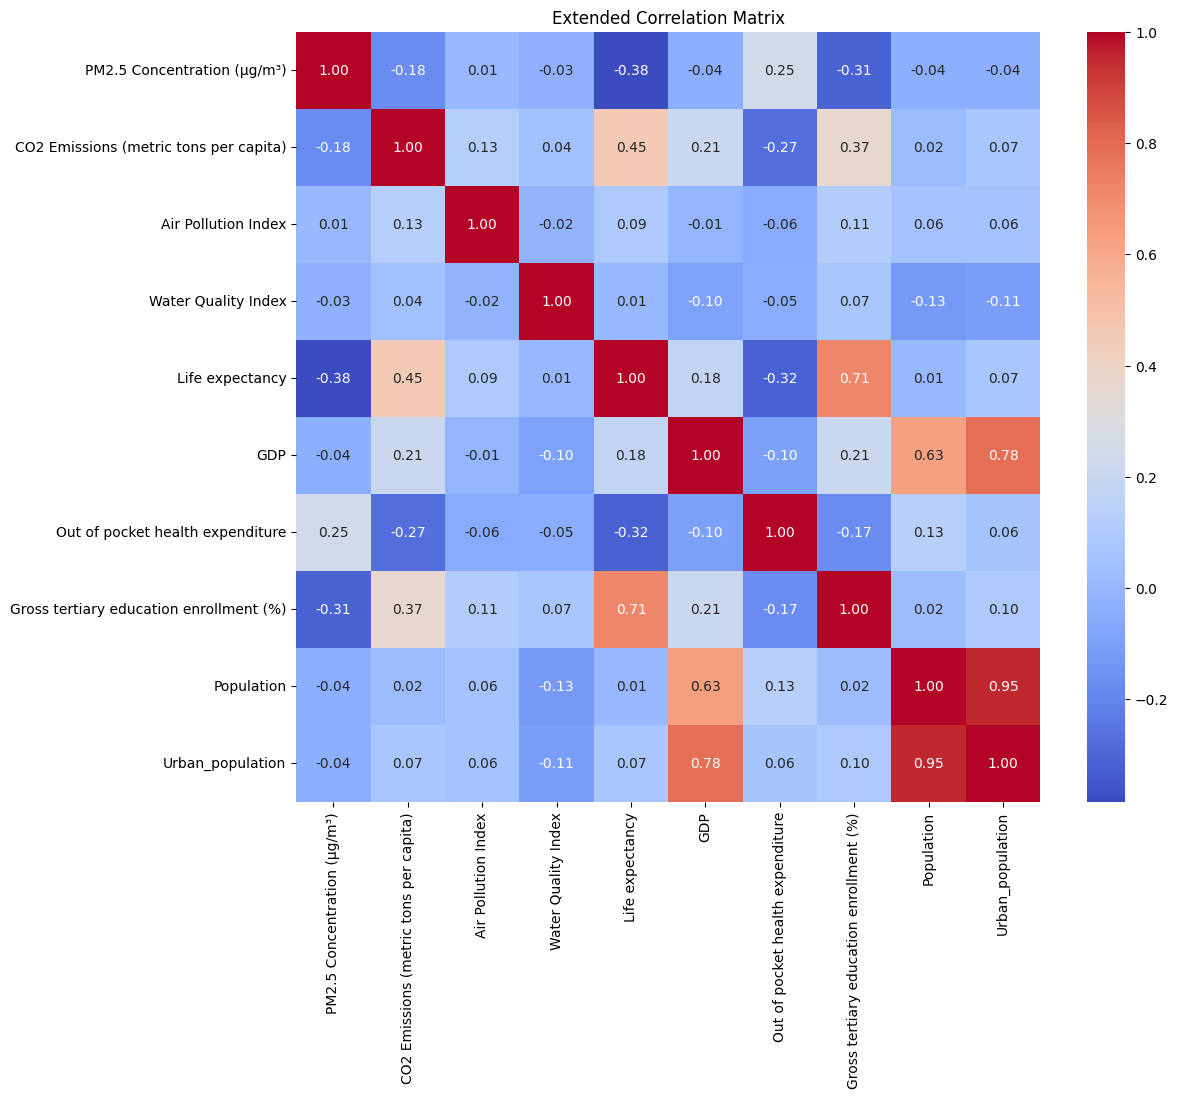

In [5]:
import seaborn as sns
numeric_data = merged_data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
life_expectancy_correlation = correlation_matrix['Life expectancy'].sort_values(ascending=False)
print(life_expectancy_correlation)

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Extended Correlation Matrix')
plt.show()


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

X = merged_data.drop(['Life expectancy', 'Country'], axis=1)
y = merged_data['Life expectancy']

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test)

n_features = X_train_scaled.shape[1] 

n_components = min(n_features, 9)

pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_pca, y_train_full)
y_pred_rf = rf_model.predict(X_test_pca)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm_model.fit(X_train_pca, y_train_full)
y_pred_gbm = gbm_model.predict(X_test_pca)
rmse_gbm = np.sqrt(mean_squared_error(y_test, y_pred_gbm))
r2_gbm = r2_score(y_test, y_pred_gbm)
mae_gbm = mean_absolute_error(y_test, y_pred_gbm)

print(f"Random Forest after PCA - RMSE: {rmse_rf}, R2: {r2_rf}, MAE: {mae_rf}")
print(f"GBM after PCA - RMSE: {rmse_gbm}, R2: {r2_gbm}, MAE: {mae_gbm}")

Random Forest after PCA - RMSE: 4.337035274310829, R2: 0.5760000454718013, MAE: 3.298113259289729
GBM after PCA - RMSE: 4.70617523304804, R2: 0.5007522811821993, MAE: 3.674945794532762


In [7]:
from sklearn.model_selection import GridSearchCV

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(RandomForestRegressor(), rf_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_rf.fit(X_train_pca, y_train_full)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
best_rf_model = grid_search_rf.best_estimator_

y_pred_rf_tuned = best_rf_model.predict(X_test_pca)
rmse_rf_tuned = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned))
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
print(f"Tuned Random Forest RMSE: {rmse_rf_tuned}, R²: {r2_rf_tuned}, MAE: {mae_rf_tuned}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Random Forest RMSE: 4.343582689317708, R²: 0.5747188941944739, MAE: 3.29797386084963


In [8]:
gbm_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize GridSearchCV for GBM
grid_search_gbm = GridSearchCV(GradientBoostingRegressor(), gbm_param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_gbm.fit(X_train_pca, y_train_full)

print("Best parameters for GBM:", grid_search_gbm.best_params_)
best_gbm_model = grid_search_gbm.best_estimator_

y_pred_gbm_tuned = best_gbm_model.predict(X_test_pca)
rmse_gbm_tuned = np.sqrt(mean_squared_error(y_test, y_pred_gbm_tuned))
r2_gbm_tuned = r2_score(y_test, y_pred_gbm_tuned)
mae_gbm_tuned = mean_absolute_error(y_test, y_pred_gbm_tuned)
print(f"Tuned GBM RMSE: {rmse_gbm_tuned}, R²: {r2_gbm_tuned}, MAE: {mae_gbm_tuned}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for GBM: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Tuned GBM RMSE: 4.929620111386915, R²: 0.4522191989719867, MAE: 3.745625049929605


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor

stacked_model = StackingRegressor(
    estimators=[('rf', best_rf_model), ('gbm', best_gbm_model)],
    final_estimator=LinearRegression()
)

stacked_model.fit(X_train_pca, y_train_full)

y_pred_stacked = stacked_model.predict(X_test_pca)
rmse_stacked = np.sqrt(mean_squared_error(y_test, y_pred_stacked))
r2_stacked = r2_score(y_test, y_pred_stacked)

print(f"Stacked Model RMSE: {rmse_stacked}, R²: {r2_stacked}")

Stacked Model RMSE: 4.495871280172977, R²: 0.5443749027010698


In [10]:
from sklearn.model_selection import cross_val_predict

cv = KFold(n_splits=5, random_state=42, shuffle=True)

y_cv_rf = cross_val_predict(best_rf_model, X_train_pca, y_train_full, cv=cv)
y_cv_gbm = cross_val_predict(best_gbm_model, X_train_pca, y_train_full, cv=cv)

mean_rmse_rf = np.sqrt(mean_squared_error(y_train_full, y_cv_rf))
mean_rmse_gbm = np.sqrt(mean_squared_error(y_train_full, y_cv_gbm))
mean_mae_rf = mean_absolute_error(y_train_full, y_cv_rf)
mean_mae_gbm = mean_absolute_error(y_train_full, y_cv_gbm)
mean_r2_rf = r2_score(y_train_full, y_cv_rf)
mean_r2_gbm = r2_score(y_train_full, y_cv_gbm)

print(f"Mean CV RMSE - RF: {mean_rmse_rf:.3f}")
print(f"Mean CV RMSE - GBM: {mean_rmse_gbm:.3f}")
print(f"Mean CV MAE - RF: {mean_mae_rf:.3f}")
print(f"Mean CV MAE - GBM: {mean_mae_gbm:.3f}")
print(f"Mean CV R² - RF: {mean_r2_rf:.3f}")
print(f"Mean CV R² - GBM: {mean_r2_gbm:.3f}")

# Stacked Model
stacked_predictions = cross_val_predict(stacked_model, X_train_pca, y_train_full, cv=cv)
mean_rmse_stacked = np.sqrt(mean_squared_error(y_train_full, stacked_predictions))
mean_mae_stacked = mean_absolute_error(y_train_full, stacked_predictions)
mean_r2_stacked = r2_score(y_train_full, stacked_predictions)

print(f"Stacked Model - Mean CV RMSE: {mean_rmse_stacked:.3f}")
print(f"Stacked Model - Mean CV MAE: {mean_mae_stacked:.3f}")
print(f"Stacked Model - Mean CV R²: {mean_r2_stacked:.3f}")

y_pred_stacked_final = stacked_model.predict(X_test_pca)
final_rmse_stacked = np.sqrt(mean_squared_error(y_test, y_pred_stacked_final))
final_r2_stacked = r2_score(y_test, y_pred_stacked_final)

print(f"Final Stacked Model RMSE: {final_rmse_stacked:.3f}")
print(f"Final Stacked Model R²: {final_r2_stacked:.3f}")

Mean CV RMSE - RF: 5.149
Mean CV RMSE - GBM: 5.463
Mean CV MAE - RF: 3.974
Mean CV MAE - GBM: 4.250
Mean CV R² - RF: 0.526
Mean CV R² - GBM: 0.467
Stacked Model - Mean CV RMSE: 5.227
Stacked Model - Mean CV MAE: 4.041
Stacked Model - Mean CV R²: 0.512
Final Stacked Model RMSE: 4.496
Final Stacked Model R²: 0.544


In [11]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred_stacked = stacked_model.predict(X_test_pca)

rmse_meta = np.sqrt(mean_squared_error(y_test, y_pred_stacked))

print(f"Meta-Model RMSE: {rmse_meta:.3f}")

Meta-Model RMSE: 4.496


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
X = merged_data.drop(['Life expectancy', 'Country'], axis=1)
y = merged_data['Life expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid_rf = {
    'random_forest__n_estimators': [100, 200, 300],
    'random_forest__max_depth': [None, 10, 20],
    'random_forest__min_samples_split': [2, 5, 10],
    'random_forest__max_features': ['auto', 'sqrt', 'log2']
}

param_grid_gbm = {
    'gradient_boost__n_estimators': [100, 200, 300],
    'gradient_boost__learning_rate': [0.05, 0.1, 0.2],
    'gradient_boost__max_depth': [3, 5, 7],
    'gradient_boost__subsample': [0.8, 0.9, 1.0]
}

pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),  # Using variance ratio for PCA component selection
    ('random_forest', RandomForestRegressor(random_state=42))
])

pipeline_gbm = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('gradient_boost', GradientBoostingRegressor(random_state=42))
])

grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_gbm = GridSearchCV(pipeline_gbm, param_grid_gbm, cv=5, scoring='neg_mean_squared_error', verbose=1)

grid_search_rf.fit(X_train, y_train)
grid_search_gbm.fit(X_train, y_train)

cv_results_rf = cross_val_score(grid_search_rf.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_results_gbm = cross_val_score(grid_search_gbm.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

mean_cv_rmse_rf = np.sqrt(-np.mean(cv_results_rf))
mean_cv_rmse_gbm = np.sqrt(-np.mean(cv_results_gbm))

print(f"Refined Mean CV RMSE - RF: {mean_cv_rmse_rf:.3f}")
print(f"Refined Mean CV RMSE - GBM: {mean_cv_rmse_gbm:.3f}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits


C:\Users\super\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
135 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\super\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\super\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\super\AppData\Local\Programs\Python\Python39\lib\site-packages

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Refined Mean CV RMSE - RF: 4.900
Refined Mean CV RMSE - GBM: 4.902


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=rf_param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1
)

grid_search_rf.fit(X_train_pca, y_train_full)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
best_rf_model = grid_search_rf.best_estimator_

gbm_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search_gbm = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=gbm_param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1
)

grid_search_gbm.fit(X_train_pca, y_train_full)

print("Best parameters for GBM:", grid_search_gbm.best_params_)
best_gbm_model = grid_search_gbm.best_estimator_

y_pred_rf_tuned = best_rf_model.predict(X_test_pca)
rmse_rf_tuned = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned))
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
print(f"Tuned Random Forest - RMSE: {rmse_rf_tuned:.3f}, R²: {r2_rf_tuned:.3f}, MAE: {mae_rf_tuned:.3f}")

y_pred_gbm_tuned = best_gbm_model.predict(X_test_pca)
rmse_gbm_tuned = np.sqrt(mean_squared_error(y_test, y_pred_gbm_tuned))
r2_gbm_tuned = r2_score(y_test, y_pred_gbm_tuned)
mae_gbm_tuned = mean_absolute_error(y_test, y_pred_gbm_tuned)
print(f"Tuned GBM - RMSE: {rmse_gbm_tuned:.3f}, R²: {r2_gbm_tuned:.3f}, MAE: {mae_gbm_tuned:.3f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for GBM: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Tuned Random Forest - RMSE: 4.304, R²: 0.582, MAE: 3.205
Tuned GBM - RMSE: 4.834, R²: 0.473, MAE: 3.690


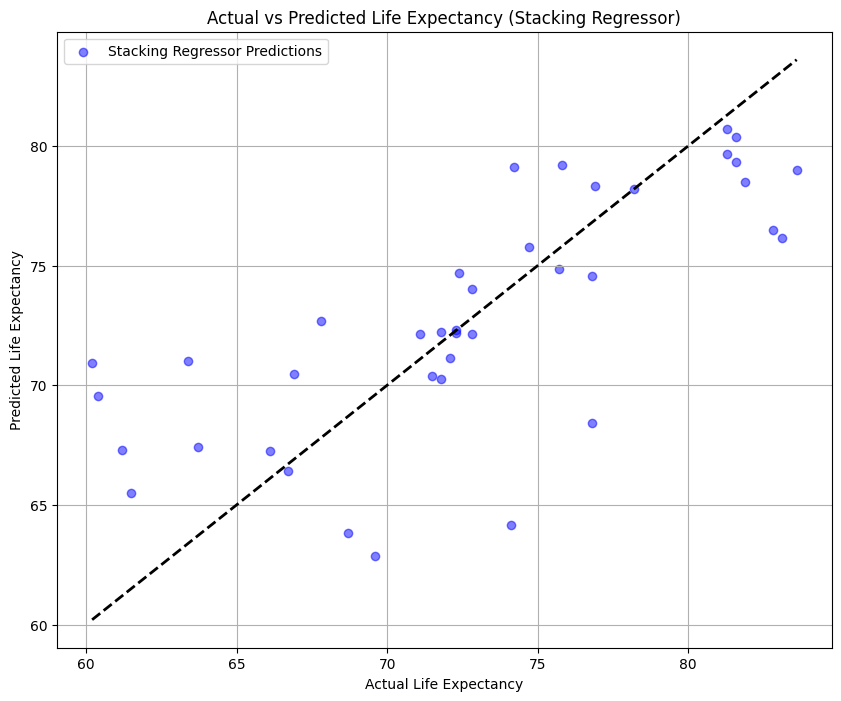

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

plt.figure(figsize=(10, 8)) 
plt.scatter(y_test, y_pred_stacked, alpha=0.5, color='blue', label='Stacking Regressor Predictions')  
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  

plt.title('Actual vs Predicted Life Expectancy (Stacking Regressor)')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.legend()
plt.grid(True) 

plt.show()